# Assignment 2 - Supervised Machine Learning Fundamentals

## DERRICK NEMETCHEK
Netid: 790819935

*Names of students you worked with on this assignment*: Ian, Dalton, Ashmita, Ma.

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. Flexible will perform better because of large sample size which will prevent overtraining on data. We don't know how good the predictors are so we don't need to worry about it for now.
2. Likewise a flexible model will perform worse because of the small sample size. Predictors don't matter as much as a large test set
3. A flexible model will perform better because it will better fit the non-linear relationship
4. A flexible model will perform worse because it may train on the high variance too much

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


**a)**
- i. Regression as CEO salary is a quantitative feature
- ii. Inference, trying to understand best features
- iii. n=500 p=3. Assume record is not a feature

**b)**
- i. Classification as success or failure is qualitative
- ii. Predictive as we are trying to predict if a new product will fail or succeed 
- iii. n=20, p=13. Assume success/failure is not a feature

**c)**
- i. Regression. % change is quantitative
- ii. Predicting % change in USD compared to other markets
- iii. n=52 weeks in a year, p=3. Assume % change in USD is not a feature.

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [1]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

X_test = [0,0,0]
distances = []

for i in range(len(X)):
    distance = np.linalg.norm(X[i] - X_test)
    distances.append(distance)
for i in range(len(distances)):
    print('distance:', round(distances[i], 2), 'classification:', y[i])


distance: 3.0 classification: r
distance: 2.0 classification: r
distance: 3.16 classification: r
distance: 2.24 classification: b
distance: 1.41 classification: b
distance: 1.73 classification: r



**ANSWER**:

**a.**
| Point | Distance | Classification   |
|------|-------|-------|
| **1**| 3.0     | r     |
| **2**| 2.0     | r     |
| **3**| 3.16     | r     |
| **4**| 2.24     | b     |
| **5**| 1.41    | b     |
| **6**| 1.73     | r     |

**b.**
For K=1 the prediction is blue because the nearest point has a distance of 1.41 and is blue

**c.**
For K=3 prediction is red because the closest 3 points have 2 red and 1 blue

**d.**
A low value would be better. Due to the non-linear boundary, higher K values may tally points that cross the boundary and give wrong classifications.


## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

In [46]:
# imports
import pandas as pd
import numpy as np


# Setup low-dim training data
X_train_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_X_train_low.csv'
X_train = pd.read_csv(X_train_path, names=['Feature 1', 'Feature 2'])

y_train_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_y_train_low.csv'
y_train = pd.read_csv(y_train_path, names=['Classification'])

# Setup low-dim testing data
X_test_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_X_test_low.csv'
X_test = pd.read_csv(X_test_path, names=['Feature 1', 'Feature 2'])
y_test_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_y_test_low.csv'
y_test = pd.read_csv(y_test_path, names=['Classification'])


## Setup high dimensional training data
X_train_high_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_X_train_high.csv'
X_train_high = pd.read_csv(X_train_high_path)

y_train_high_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_y_train_high.csv'
y_train_high = pd.read_csv(y_train_high_path, names=['Classification'])

## Setup high dimensional testing data
X_test_high_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_X_test_high.csv'
X_test_high = pd.read_csv(X_test_high_path)
y_test_high_path = 'https://raw.githubusercontent.com/kylebradbury/ids705_sp2022/main/assignments/data/A2_y_test_high.csv'
y_test_high = pd.read_csv(y_test_high_path, names=['Classification'])

In [122]:
# Skeleton code for part (a) to write your own kNN classifier
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.X_train = []
        self.y_train = []
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X_train = x
        self.y_train = y
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        
        
        # loop through x
        for i in range(len(x)):
            # loop through training x
            distances = []
            for j in range(len(x)):
                distance = np.linalg.norm(x.iloc[i] - self.X_train.iloc[j].values)
                #print(distance)
                distances.append(distance)
            # Get indices of k min distances
            distances = np.array(distances)
            ascendingDistances = np.argsort(distances)[:k]
            classifications = (y_train.iloc[ascendingDistances].values)
            classifications = np.array(classifications).flatten()
            # get the most common classification
            values, counts = np.unique(classifications, return_counts=True)
            ind = np.argmax(counts)
            y_hat.append((values[ind]))  # append most frequent classification
        #print("Indices:",descendingDistances)
        #print("Values:", distances[descendingDistances])
        # Return the estimated targets
        return y_hat

# test KNN here
#knnClass = Knn()
#knnClass.fit(X_train,y_train)
#y_test_pred = knnClass.predict(X_test,3)

# Metric of overall classification accuracy
# (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = np.sum(y == y_hat) / nvalues
    return accuracy
print(accuracy(np.array(y_test_pred), np.array(y_test).flatten()))

0.916


In [153]:
import time
startTime = time.time() 


knnClass = Knn()
knnClass.fit(X_train,y_train)
y_test_pred_low = knnClass.predict(X_test,5)
low_accuracy = accuracy(np.array(y_test_pred_low), np.array(y_test).flatten())

endTime = time.time()
time_low = (endTime-startTime)

In [ ]:
import time
startTime = time.time() 


knnClass = Knn()
knnClass.fit(X_train_high,y_train_high)
y_test_pred_high = knnClass.predict(X_test_high,5)
y_test_high[0].pop()
high_accuracy = accuracy(np.array(y_test_pred_high), np.delete(np.array(y_test_high).flatten(), 0))
endTime = time.time()
time_high = (endTime-startTime)


In [191]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5) 

# train low dataset
clf.fit(X_train, y_train)
startTime = time.time() 
clf_y_test_pred_low = clf.predict(X_test)
clf_low_accuracy = (accuracy(np.array(clf_y_test_pred_low), np.array(y_test).flatten()))
endTime = time.time()
clf_time_low = (endTime-startTime)

# train high dataset
clf.fit(X_train_high, y_train_high.drop(index=0))
startTime = time.time() 
clf_y_test_pred_high = clf.predict(X_test_high)
clf_high_accuracy = accuracy(clf_y_test_pred_high, np.delete(np.array(y_test_high).flatten(), 0))
endTime = time.time()
clf_time_high = (endTime-startTime)

c:\Users\Derrick\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Derrick\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Derrick\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -1.033361861907618540e+01
- -1.057458979729323456e+00
- -1.063436384943348045e+01
- -1.086029046299020351e+01
- -1.090299118729886052e+00
- ...
Feature names seen at fit time, yet now missing:
- -1.012885583210112017e+00
- -1.0483229557

**ANSWER**:

In [193]:
print('For handmade KNN classifier:')
print('low-dim time (s):', time_low, 'accuracy:', low_accuracy)
print('high-dim time (s):', time_high, 'accuracy:', high_accuracy)
print('')
print("For Sklearn KNN classifier:")
print('low-dim time (s):', clf_time_low, 'accuracy:', clf_low_accuracy)
print('high-dim time (s):', clf_time_high, 'accuracy:', clf_high_accuracy)


For handmade KNN classifier:
low-dim time (s): 277.0074038505554 accuracy: 0.925
high-dim time (s): 271.8136188983917 accuracy: 0.995995995995996

For Sklearn KNN classifier:
low-dim time (s): 0.024074077606201172 accuracy: 0.925
high-dim time (s): 0.057626962661743164 accuracy: 0.992992992992993


**(d)**
The handmade knnclassifier is extremely slow compared to sklearn's. This is most likely due to the use of pandas.iloc to acquire distance in every loop. This could be fixed by using a numpy array.
For the low dimensional dataset the accuracy is the same however for the high dimensional dataset my model is very slightly more accurate by about 0.03

**(e)**
The drawback of prediction being slow is it affects how long accuracy and other metrics can be used to determine how good thee model is. Slow testing can be worsee than slow training if trying to find the optimal parameters which will have an effect on getting metrics.

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

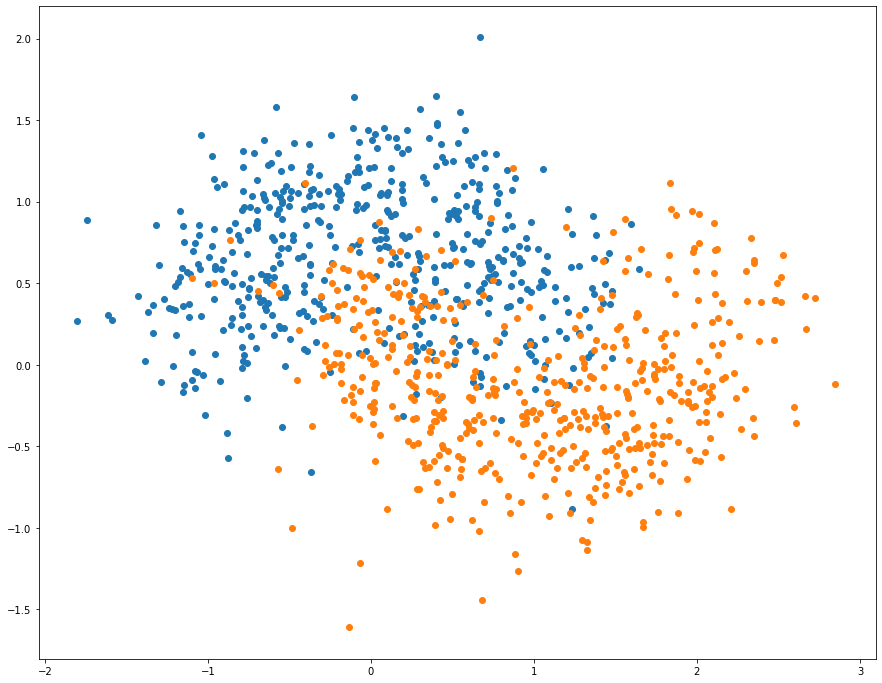

In [56]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# a.
X,y = make_moons(n_samples=1000,noise=0.35)

# b.
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
#newcmp = LinearSegmentedColormap.from_list("new", [(r/255, g/255, b/255), (r/255, g/255, b/255)], N=2)

# c.

# create random indicies
random_i_1 = np.random.choice(1000,100, replace=True)
random_i_2 = np.random.choice(1000,100, replace=True)
random_i_3 = np.random.choice(1000,100, replace=True)
X_1 = X[random_i_1]
y_1 = y[random_i_1]
X_2 = X[random_i_2]
y_2 = y[random_i_2]
X_3 = X[random_i_3]
y_3 = y[random_i_3]

clf1_k1 = KNeighborsClassifier(n_neighbors=1)
clf1_k25 = KNeighborsClassifier(n_neighbors=25)
clf1_k50 = KNeighborsClassifier(n_neighbors=50)
clf2_k1 = KNeighborsClassifier(n_neighbors=1)
clf2_k25 = KNeighborsClassifier(n_neighbors=25)
clf2_k50 = KNeighborsClassifier(n_neighbors=50)
clf3_k1 = KNeighborsClassifier(n_neighbors=1)
clf3_k25 = KNeighborsClassifier(n_neighbors=25)
clf3_k50 = KNeighborsClassifier(n_neighbors=50)
clf1_k1.fit(X_1, y_1)
clf1_k25.fit(X_1, y_1)
clf1_k50.fit(X_1, y_1)
clf2_k1.fit(X_2, y_2)
clf2_k25.fit(X_2, y_2)
clf2_k50.fit(X_2, y_2)
clf3_k1.fit(X_3, y_3)
clf3_k25.fit(X_3, y_3)
clf3_k50.fit(X_3, y_3)

# d.
# function imported from a previous class
def draw_classification_regions(X,y,model,row,col, label='None'):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    #fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
    #plt.subplot(3,3,grid_position)
    axes[row,col].contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    #for i in range(n_classes):
    #    plt.subplot(3,3,grid_position)
    #    plt.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    #plt.set_xlabel(feature_names[0], fontsize=15)
    #plt.set_ylabel(feature_names[1], fontsize=15)

    #axes.legend()
plt.rcParams["figure.figsize"] = [5,5]


# e.

# f.

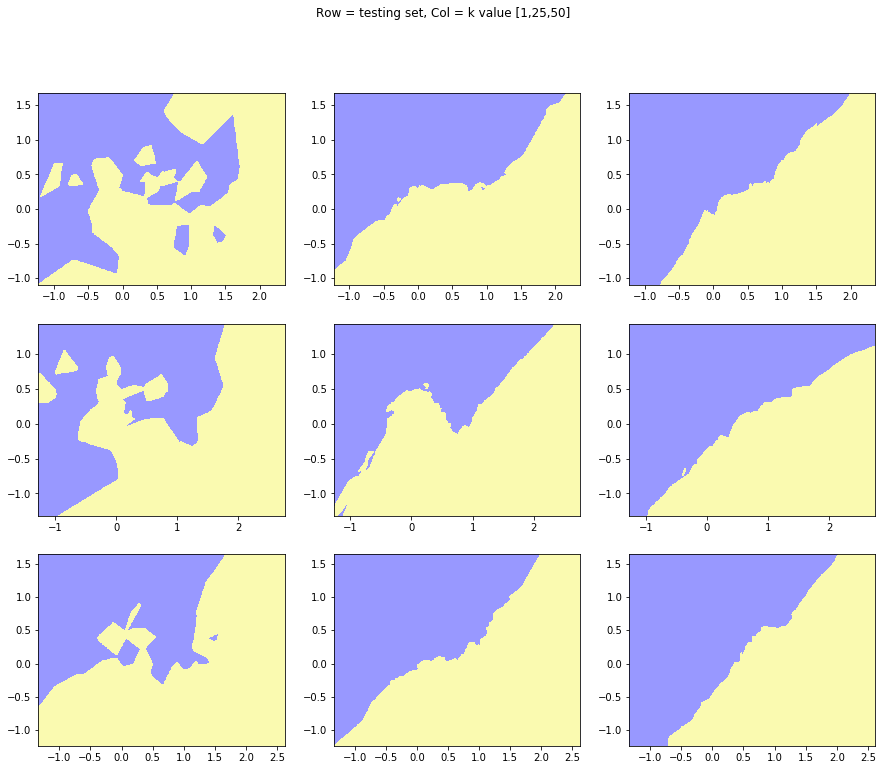

In [186]:
fig, axes = plt.subplots(nrows= 3, ncols=3)
fig.suptitle('Row = testing set, Col = k value [1,25,50]')
plt.rcParams["figure.figsize"] = [15,12]
draw_classification_regions(X_1,y_1,clf1_k1,0,0)
draw_classification_regions(X_1,y_1,clf1_k25,0,1)
draw_classification_regions(X_1,y_1,clf1_k50,0,2)
draw_classification_regions(X_2,y_2,clf2_k1,1,0)
draw_classification_regions(X_2,y_2,clf2_k25,1,1)
draw_classification_regions(X_2,y_2,clf2_k50,1,2)
draw_classification_regions(X_3,y_3,clf3_k1,2,0)
draw_classification_regions(X_3,y_3,clf3_k25,2,1)
draw_classification_regions(X_3,y_3,clf3_k50,2,2)

**ANSWER**

**(e)**
Each row (different datasets) seem to be the same for the most part
However as k increases (columns) the boundary seems to become more simple. The best boundary seems come from k=25 however the most varying boundary is when k=1

**(f)**
For k=1 the model has too much variance as it focuses on points and noise, ending up with pockets in places that don't make sense.
For k=50 the model becomes too biased, becoming more of a line
The right spot seems to be k=25 where the moon shape is more recognizable

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In [207]:
# a.
# training set is X,y
X_test,y_test = make_moons(n_samples=1000,noise=0.35)

# b.

#import accuracy function
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = np.sum(y == y_hat) / nvalues
    return accuracy

accuracies = []
kValues = list(range(1,501))
for k in kValues:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    y_test_pred = clf.predict(X_test)
    acc = accuracy(y_test_pred,y_test)
    accuracies.append(np.absolute(acc-1))



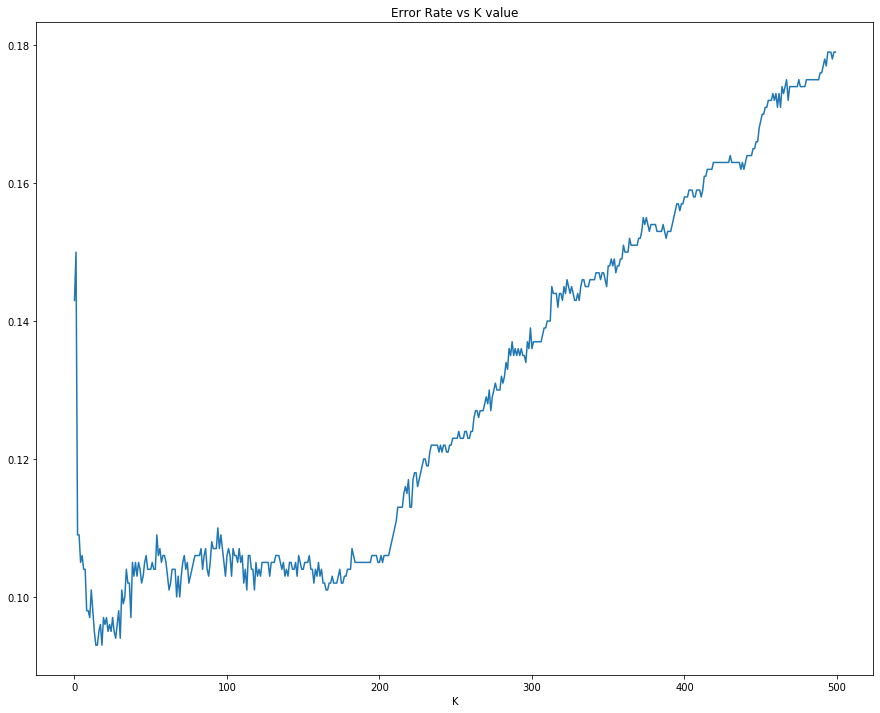

In [212]:
plt.plot(accuracies)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.show()

**ANSWER**

**c**
The trend seen is the error seems to be lowest around 10-20 then steadily increases as k increases

**d**
Low values of k mean high bias as it doesn't care as much about sorrounding points. High values of k means high variance as it gets fit to lots of other points

**e**
The optimal value of k is about 10-20 as this range has the lowest error

**f**
The flexibility of other models are their parameters. For example linear regression uses coefficients. A random forest model might use number of forests to use or depth.

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

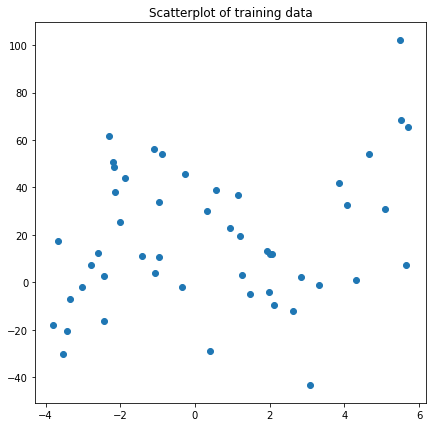


 1 feature, training set:
Coefficient: 2.590728258076131
R squared: -13.417529902100803
Mean squared error: 791.4167471701105

 1 feature, testing set:
Coefficient: 2.590728258076131
R squared: -18.925226331089725
Mean squared error: 1116.6632365616085

 2 features, training set:
Coefficient: 2.672432993168854
R squared: -1.598563049989255
Mean squared error: 611.1295970813384

 2 features, testing set:
Coefficient: 2.672432993168854
R squared: -2.9459342244473383
Mean squared error: 1177.9129694805551


In [162]:
import numpy as np
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_Q7_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/kylebradbury/ids705/main/assignments/data/A2_Q7_test.csv')

X_train = train.x.values
X_train = np.array(X_train).reshape(-1,1)
y_train = train.y.values
y_train = np.array(y_train).reshape(-1,1)

X_test = test.x.values
X_test = np.array(X_test).reshape(-1,1)
y_test = test.y.values
y_test = np.array(y_test).reshape(-1,1)

# a.
plt.rcParams["figure.figsize"] = [7,7]
plt.scatter(X_train,y_train)
plt.title('Scatterplot of training data')
plt.show()

# b. 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_test_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

# get metrics
def scorePred(pred,labels):
    from sklearn.metrics import r2_score, mean_squared_error
    r2Score = r2_score(pred, labels)
    MSE = mean_squared_error(pred, labels)
    coefficient = lin_reg.coef_[0][0]
    print('Coefficient:', coefficient)
    print('R squared:', r2Score)
    print('Mean squared error:', MSE)
print('\n 1 feature, training set:')
scorePred(y_train_pred, y_train)

print('\n 1 feature, testing set:')
scorePred(y_test_pred, y_test)

# c.
X_train_2 = np.zeros((len(X_train),3))
for i in range(len(X_train)):
    value = X_train[i]
    X_train_2[i][0] = value
    X_train_2[i][1] = np.sin(value)
    X_train_2[i][2] = 1/value

X_test_2 = np.zeros((len(X_test),3))
for i in range(len(X_test)):
    value = X_test[i]
    X_test_2[i][0] = value
    X_test_2[i][1] = np.sin(value)
    X_test_2[i][2] = 1/value

lin_reg.fit(X_train_2,y_train)
y_test_pred_2 = lin_reg.predict(X_test_2)
y_train_pred_2 = lin_reg.predict(X_train_2)


print('\n 2 features, training set:')
scorePred(y_train_pred_2.flatten(), y_train)


print('\n 2 features, testing set:')
scorePred(y_test_pred_2.flatten(), y_test)

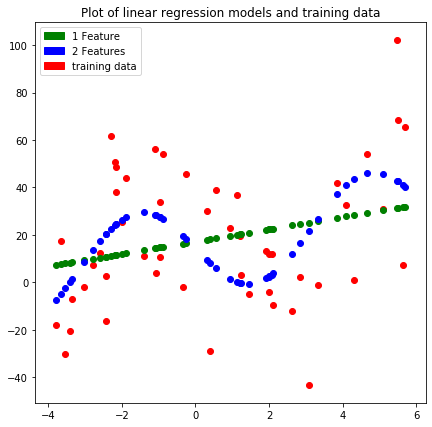

In [176]:
import matplotlib.patches as mpatches

green_patch = mpatches.Patch(color='green', label='1 Feature')
blue_patch = mpatches.Patch(color='blue', label='3 Features')
red_patch = mpatches.Patch(color='red', label='training data')

plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, y_train_pred, color="green")
plt.scatter(X_train, y_train_pred_2, color="blue")
plt.title("Plot of linear regression models and training data")
plt.legend(handles=[green_patch,blue_patch, red_patch])
plt.show()

**ANSWER**

**(e)**

Calculated in code above:

For 1 feature: 
- MSE: 1116
- R squared: -19 


For 3 feature: 
- MSE: -2.9
- R squared: 1178

**(f)**
The 3 features model performs better on the training as it has a MSE of 611 while 1 feature has MSE 791
The 1 feature model performs better on testing as it has slightly better MSE of 1116 vs 1178 from 3 features

The 3 features model has a sin and the inverse of its first feature. This helps it better fit the sin function seen in training data
This helps it predict more accurately than 1 feature, however the testing data seems quite different and it scores worse

**(g)**
If the test data is significantly different from training data, then the 3 features model may perform worse since it's tuned to a sin wave
The generalizaiton performance would become worse, more so for the 3 features model than the 1 feature